# Libraries

In [ ]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn import preprocessing
import seaborn as sns

# Current Directory

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")
!pwd  # show current path

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/.shortcut-targets-by-id/1FNDCkfZgBaoLUenHQpb6h3yPrqX4y7SU/AI


In [ ]:
%cd "/content/gdrive/MyDrive/AI"
!ls  # show current directory

/content/gdrive/.shortcut-targets-by-id/1FNDCkfZgBaoLUenHQpb6h3yPrqX4y7SU/AI
data_titanic.csv  test.csv  tested.csv	titanic_prueba.ipynb


# Data Extraction

Se carga el archivo y se hace una visualización.

In [ ]:
data_titanic = pd.read_csv("data_titanic.csv")
data_test = pd.read_csv("test.csv")

# Dataset Characteristics


Análisis de las características de los datos: número de columnas, número de filas, valores nulos que puedan causar ruido.

In [ ]:
data_titanic.info() # DataSet information. Train file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data_test.info() # DataSet information. Test file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
print(data_titanic.shape) # Shape
print(data_test.shape)

(891, 12)
(418, 11)


In [ ]:
data_titanic.describe() # Statistics Analysis


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data_test.describe()  # Statistics Analysis

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
data_titanic.head() # Head

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data_test.head() # Head

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
data_titanic.isnull().sum() # Null Values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data_test.isnull().sum()  # Null Values

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Eliminamos las columas que consideramos menos importantes o no relevantes

In [ ]:
data_titanic = data_titanic.drop(columns=['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'])
data_titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [ ]:
data_test = data_test.drop(columns=['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'])
data_test.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,male,34.5,7.8292,Q
1,3,female,47.0,7.0000,S
2,2,male,62.0,9.6875,Q
3,3,male,27.0,8.6625,S
4,3,female,22.0,12.2875,S


In [ ]:
data_test['Sex'].replace(['male', 'female'],
                        [0, 1], inplace=True)
data_test['Embarked'].replace(['S', 'C', 'Q'],
                        [0, 1, 2], inplace=True)
data_test.apply (pd.to_numeric, errors='coerce')
data_test = data_test.dropna()
data_test.isna().sum()

Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

## Visualizamos los datos

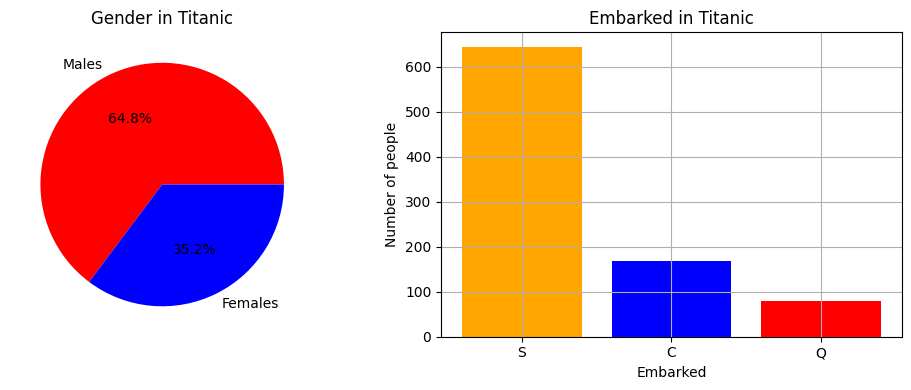

In [ ]:
data_titanic['Sex'].replace(['male', 'female'],
                        [0, 1], inplace=True)
data_titanic['Embarked'].replace(['S', 'C', 'Q'],
                        [0, 1, 2], inplace=True)
data_titanic.apply (pd.to_numeric, errors='coerce')
df = data_titanic


h = 0
m = 0
s = 0
c = 0
q = 0
categorias1 = ['Males', 'Females']
colores1 = ['red','blue']
categorias2 = ['S','C','Q']
colores2 = ['orange','blue','red']
for i,j in zip(data_titanic['Sex'],data_titanic['Embarked']):
  if i:
    m += 1
  else:
    h += 1
  if j == 0:
    s += 1
  elif j == 1:
    c += 1
  else:
    q = q + 1
sexo = [h,m]
emb = [s,c,q]
# Create the figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
# First pie chart for gender
axes[0].pie(sexo, labels=categorias1, colors=colores1, autopct='%.1f%%')
axes[0].set_title('Gender in Titanic')
# Segundo gráfico de barras
axes[1].bar(categorias2, emb, color=colores2)
axes[1].set_xlabel('Embarked')
axes[1].set_ylabel('Number of people')
axes[1].set_title('Embarked in Titanic')
axes[1].grid()
# Ajustar el espaciado entre los subplots
plt.tight_layout()
# Mostrar los gráficos
plt.show()

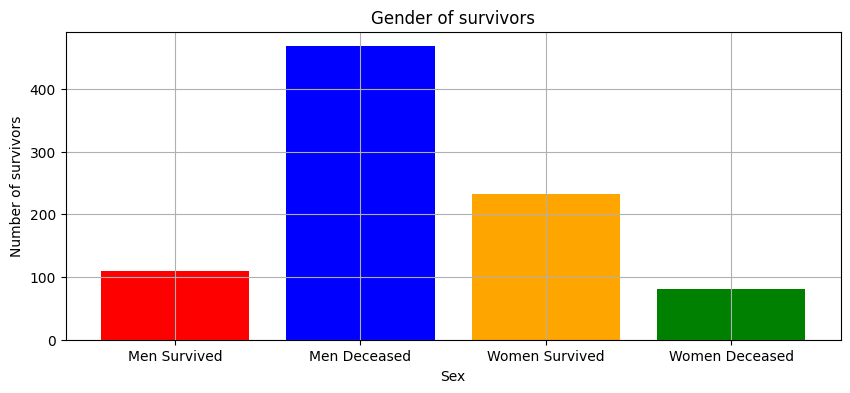

In [ ]:
df2 = df.dropna()
category = ['Men Survived', 'Men Deceased', 'Women Survived', 'Women Deceased']
hv = 0
hm = 0
mv = 0
mm = 0
colors = ['red','blue','orange','green']
for i,j in zip(data_titanic['Sex'],data_titanic['Survived']):
  if i == 0 and j == 1:
    hv = hv + 1
  elif  i == 0 and j == 0:
    hm =hm + 1
  elif  i == 1 and j == 1:
    mv =mv + 1
  elif  i == 1 and j == 0:
    mm = mm+1
data = [hv,hm,mv,mm]
# Crear la figura con subplots
fig, axes = plt.subplots(1, 1, figsize=(10, 4))
# Primer gráfico de barras
axes.bar(category, data, color=colors)
axes.set_xlabel('Sex')
axes.set_ylabel('Number of survivors')
axes.set_title('Gender of survivors')
axes.grid()


[ 0.42  20.125 28.    38.    80.   ]


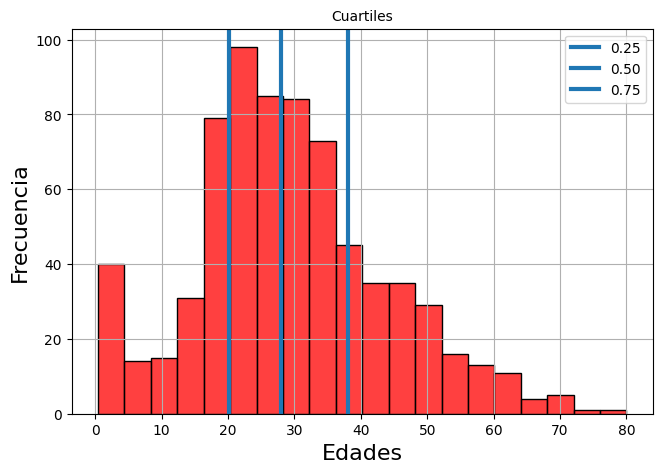






[ 0.42 19.   25.   31.8  41.   80.  ]


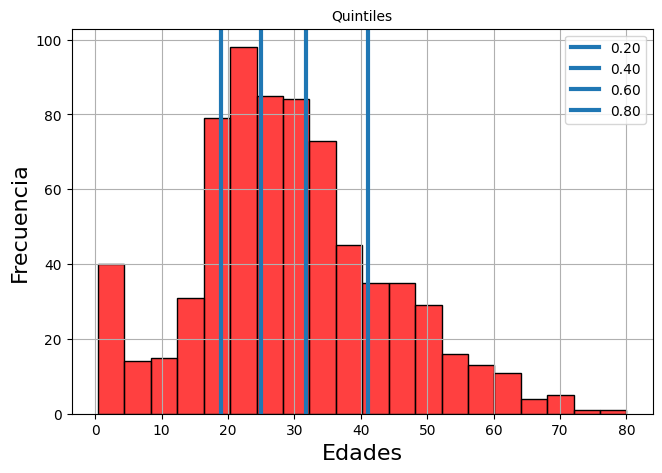

In [ ]:
data = data_titanic['Age'].sort_values()
data_cleaned = data.dropna()

x = np.quantile(data_cleaned, [0, 1/3, 2/3, 1])

cuantiles = [(4, "Cuartiles"),(5, "Quintiles")]

cortes = []
for cuantil in cuantiles:
    corte = []
    valor = 0
    for i in range(cuantil[0]-1):
        valor += 1/cuantil[0]
        corte.append(valor)
    cortes.append(corte)
for i in range(len(cuantiles)):
    plt.figure(figsize=(7.5, 5))
    plt.title(cuantiles[i][1], size=10)
    plt.ylabel("Frecuencia", size=16)
    plt.xlabel("Edades", size=16)
    sns.histplot(data_titanic['Age'], bins=20, kde=False, color = "red")
    plt.grid()
    print(np.quantile(data_cleaned, [0] + cortes[i] + [1]))
    for corte in cortes[i]:
        plt.axvline(x = np.quantile(data_cleaned, corte), label="%.2f" % corte, linewidth=3)
    plt.legend()
    plt.show()
    print("\n"*4)

<ipython-input-104-e48f03c14f1e>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_titanic['Age'], shade=True)


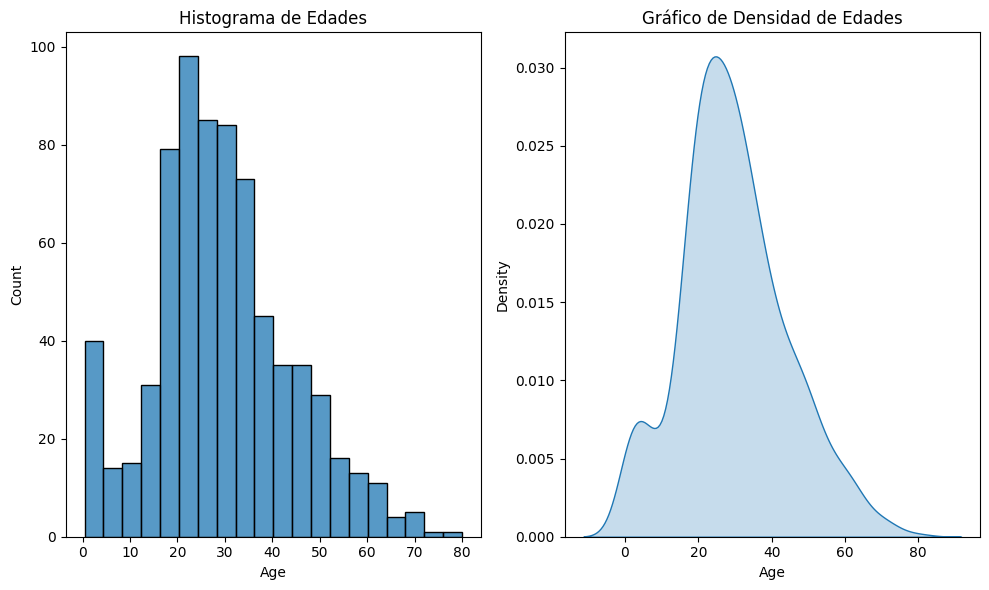

In [ ]:
# Crear una figura con dos subplots
plt.figure(figsize=(10, 6))

# Histograma de la distribución de edades
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer subplot
sns.histplot(data_titanic['Age'], bins=20, kde=False)
plt.title('Histograma de Edades')

# Gráfico de densidad de la distribución de edades
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo subplot
sns.kdeplot(data_titanic['Age'], shade=True)
plt.title('Gráfico de Densidad de Edades')

plt.tight_layout()
plt.show()

Eliminamos todas las filas con datos nulos

In [ ]:
df2.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

In [ ]:
data_test

,Pclass,Sex,Age,Fare,Embarked
0,3,0,34.5,7.8292,2
1,3,1,47.0,7.0000,0
2,2,0,62.0,9.6875,2
3,3,0,27.0,8.6625,0
4,3,1,22.0,12.2875,0
...,...,...,...,...,...
409,3,1,3.0,13.7750,0
411,1,1,37.0,90.0000,2
412,3,1,28.0,7.7750,0
414,1,1,39.0,108.9000,1


Hacemos un análisis de correlación para identificar qué variables están más ligadas a sobrevivir

<Axes: >

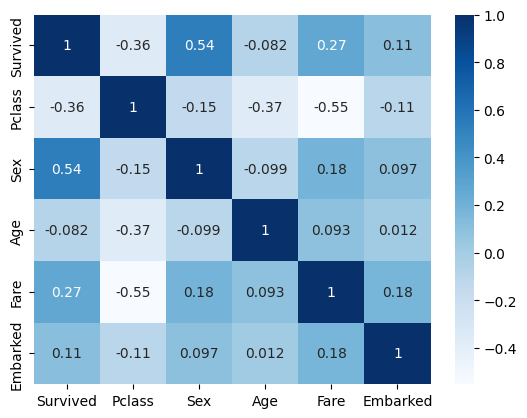

In [ ]:
corr = df2.corr()
sb.heatmap(corr, cmap = 'Blues', annot = True)

## Preparando modelos AI

In [ ]:
#feature_names = [ 'Age', 'Sex', 'Pclass', 'Embarked', 'Fare']
#X_train = df2[feature_names] #variables predictoras
#y_train = df2['Survived'] #variable de respuesta
#X_test = data_test[feature_names]
#y_test = data_test['Survived']

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn import metrics

In [ ]:
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Disbursed'])

    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]

    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain['Disbursed'], cv=cv_folds, scoring='roc_auc')

    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain['Disbursed'].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Disbursed'], dtrain_predprob))

    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

## Modelos utilizando base de datos sin valores nulos

In [ ]:
feature_names = ['Age', 'Sex', 'Pclass', 'Embarked', 'Fare']
X = df2[feature_names] # variables predictoras
y = df2['Survived']    # variable de respuesta
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [ ]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('MLP', MLPClassifier()))

In [ ]:
names = []
scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.643357
1  SVC  0.671329
2   LR  0.755245
3   DT  0.713287
4  GNB  0.755245
5   RF  0.769231
6   GB  0.783217
7  MLP  0.741259


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Gradient Boosting

Accuracy: 0.8111888111888111
Precision: 0.7735849056603774
Recall: 0.9647058823529412
Fone: 0.8586387434554973


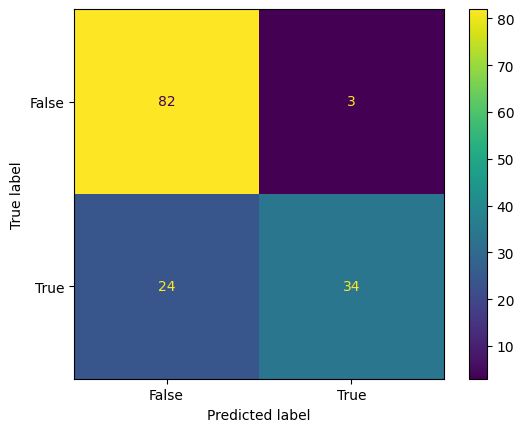

In [ ]:
GB = GradientBoostingClassifier(learning_rate=0.01, subsample=0.6)
GB.fit(X_train, y_train)
y_pred = GB.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
accuracy = (confusion_matrix[0,0] + confusion_matrix[1,1]) / (confusion_matrix[0,0]+confusion_matrix[0,1]+confusion_matrix[1,0]+confusion_matrix[1,1])
print('Accuracy:',accuracy)
precision = confusion_matrix[0,0] /(confusion_matrix[0,0]+confusion_matrix[1,0])
print("Precision:",precision)
recall = confusion_matrix[0,0] /(confusion_matrix[0,0]+confusion_matrix[0,1])
print("Recall:",recall)
Fone = (2*precision*recall)/(precision+recall)
print('Fone:',Fone)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

Text(0, 0.5, 'Feature Importance Score')

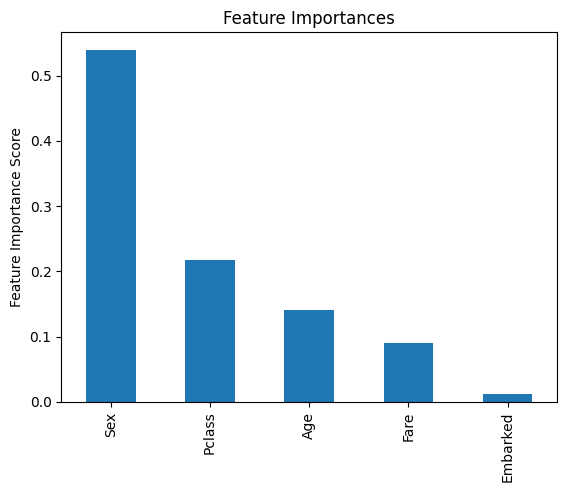

In [ ]:
feat_imp = pd.Series(GB.feature_importances_, feature_names).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [ ]:
print(y_pred)
accuracy_score(y_test, y_pred)

[1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1
 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1]


0.8111888111888111

In [ ]:
#GB.predict_proba(X_test)
y_pred2 = (GB.predict_proba(X_test)[:,1] >= 0.45).astype(bool)
y_pred2 = y_pred2 * 1
print(y_pred2)
accuracy_score(y_test, y_pred2)

[1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1
 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1
 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1]


0.7902097902097902

In [ ]:
import xgboost as xgb

Accuracy: 0.8391608391608392
Precision: 0.8522727272727273
Recall: 0.8823529411764706
Fone: 0.8670520231213872


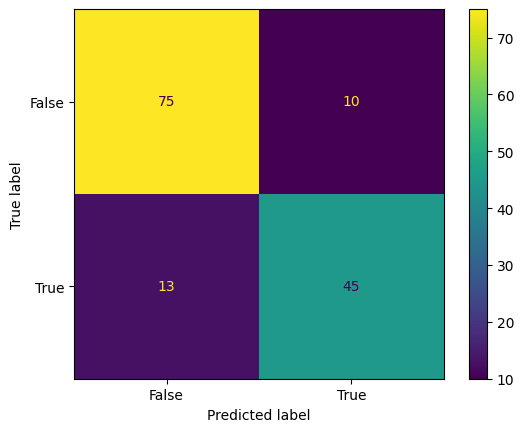

In [ ]:
xGB = xgb.XGBClassifier(learning_rate = 0.1, subsample = 0.2, min_child_weight = 2, reg_alpha = 1.5)
xGB.fit(X_train, y_train)
y_pred = xGB.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
accuracy = (confusion_matrix[0,0] + confusion_matrix[1,1]) / (confusion_matrix[0,0]+confusion_matrix[0,1]+confusion_matrix[1,0]+confusion_matrix[1,1])
print('Accuracy:',accuracy)
precision = confusion_matrix[0,0] /(confusion_matrix[0,0]+confusion_matrix[1,0])
print("Precision:",precision)
recall = confusion_matrix[0,0] /(confusion_matrix[0,0]+confusion_matrix[0,1])
print("Recall:",recall)
Fone = (2*precision*recall)/(precision+recall)
print('Fone:',Fone)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

### Red Neuronal

In [ ]:
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)  # Capas y Parámetros
mlp_model.fit(X_train, y_train)
mlp_score = mlp_model.score(X_test, y_test)
print("MLP Score:", mlp_score)

MLP Score: 0.7552447552447552


### Regularización en Árboles de Decisión

In [ ]:
regularized_tree = DecisionTreeClassifier(max_depth=5, min_samples_split=5)  # Configura los parámetros
regularized_tree.fit(X_train, y_train)
regularized_tree_score = regularized_tree.score(X_test, y_test)
print("Regularized Tree Score:", regularized_tree_score)

Regularized Tree Score: 0.8111888111888111


## Modelos utilizando la base de datos preservando los valores nulos

In [ ]:
feature_names = ['Age', 'Sex', 'Pclass', 'Embarked', 'Fare']
X = df2[feature_names] # variables predictoras
y = df2['Survived']    # variable de respuesta
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [ ]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('MLP', MLPClassifier()))

In [ ]:
names = []
scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.643357
1  SVC  0.671329
2   LR  0.755245
3   DT  0.713287
4  GNB  0.755245
5   RF  0.769231
6   GB  0.783217
7  MLP  0.762238


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


accuracy: 0.7832167832167832


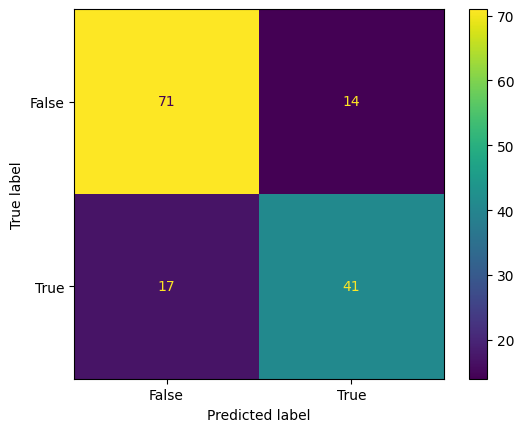

In [ ]:
GB = GradientBoostingClassifier()
GB.fit(X_train, y_train)
y_pred = GB.predict(X_test)
print('accuracy:', accuracy_score(y_test, y_pred))
#print(confusion_matrix)
#precision = vp1 /(vp1+fp1)
#recall = vp1 /(vp1+fn1)
#Fone = (2*precision*recall)/(precision+recall)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()